In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_excel(r'C:\Users\acer\Desktop\sample_datasets\Data Analytics Intern.xlsx')

In [4]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [5]:
df.drop(['Buyer/Spender'],axis=1,inplace=True)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [9]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
df['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [11]:
df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [12]:
df['total_spd']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total_spd
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [13]:
df.groupby(['Channel']).sum()['total_spd']

Channel
Hotel     7999569
Retail    6619931
Name: total_spd, dtype: int64

In [14]:
df.groupby(['Region']).sum()['total_spd']

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: total_spd, dtype: int64

In [15]:
df1=df.groupby(['Region','Channel']).sum()['total_spd'].to_frame('R_C_Spd').reset_index()
df1


,Region,Channel,R_C_Spd
0,Lisbon,Hotel,1538342
1,Lisbon,Retail,848471
2,Oporto,Hotel,719150
3,Oporto,Retail,835938
4,Other,Hotel,5742077
5,Other,Retail,4935522


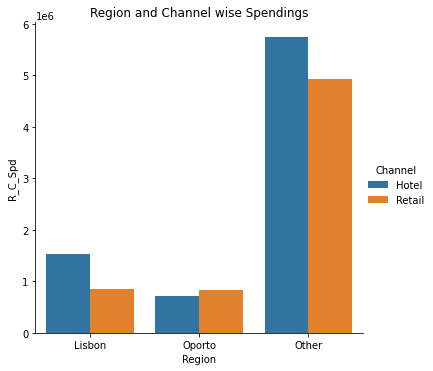

In [16]:
sns.catplot(x='Region',y='R_C_Spd',hue='Channel',kind='bar',data=df1)
plt.title('Region and Channel wise Spendings')
plt.show()

Text(0.5, 1.0, 'Delicatessen :Regional and Channel wise Spendings')

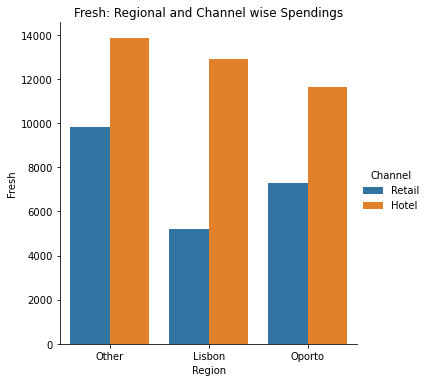

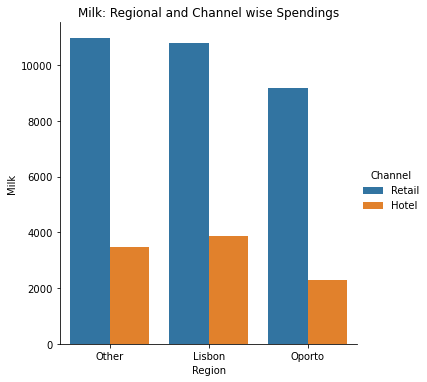

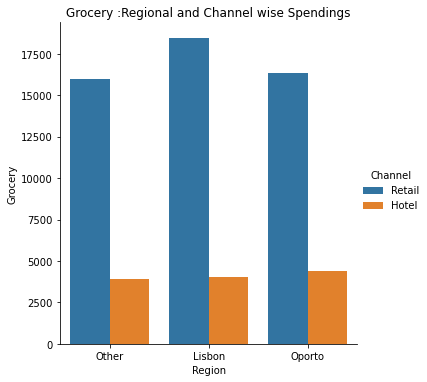

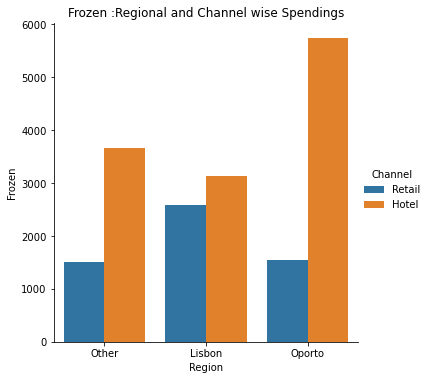

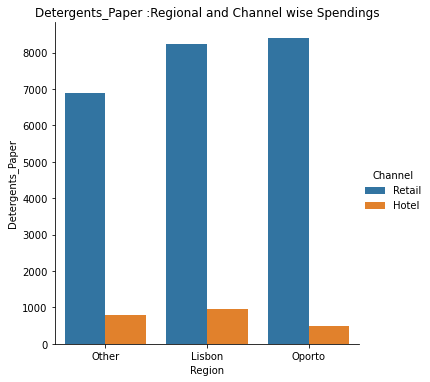

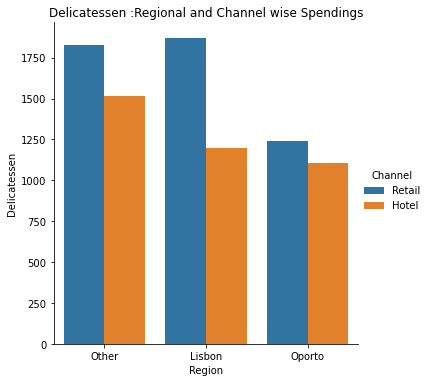

In [17]:

sns.catplot(x='Region',y='Fresh',hue='Channel',kind='bar',ci=None,data=df)
plt.title('Fresh: Regional and Channel wise Spendings')

sns.catplot(x='Region',y='Milk',hue='Channel',kind='bar',ci=None,data=df)
plt.title('Milk: Regional and Channel wise Spendings')

sns.catplot(x='Region',y='Grocery',hue='Channel',kind='bar',ci=None,data=df)

plt.title('Grocery :Regional and Channel wise Spendings')

sns.catplot(x='Region',y='Frozen',hue='Channel',kind='bar',ci=None,data=df)
plt.title('Frozen :Regional and Channel wise Spendings')

sns.catplot(x='Region',y='Detergents_Paper',hue='Channel',kind='bar',ci=None,data=df)
plt.title('Detergents_Paper :Regional and Channel wise Spendings')

sns.catplot(x='Region',y='Delicatessen',hue='Channel',kind='bar',ci=None,data=df)
plt.title('Delicatessen :Regional and Channel wise Spendings')



In [18]:
df2=df.drop(['Channel','Region'],axis=1)
df2=df2.drop(['total_spd'],axis=1)
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [19]:
for i in df2.columns:
    rng=df2[i].max()-df2[i].min()
    print(' range of {} = {}'.format(i,rng))
       
        
    
   

 range of Fresh = 112148
 range of Milk = 73443
 range of Grocery = 92777
 range of Frozen = 60844
 range of Detergents_Paper = 40824
 range of Delicatessen = 47940


In [20]:

for i in df2.columns:
    q1,q3=df2[i].sort_values().quantile([0.25,0.75])
    iqr=q3-q1
    print('IQR of {} = {}'.format(i,iqr))
    


IQR of Fresh = 13806.0
IQR of Milk = 5657.25
IQR of Grocery = 8502.75
IQR of Frozen = 2812.0
IQR of Detergents_Paper = 3665.25
IQR of Delicatessen = 1412.0


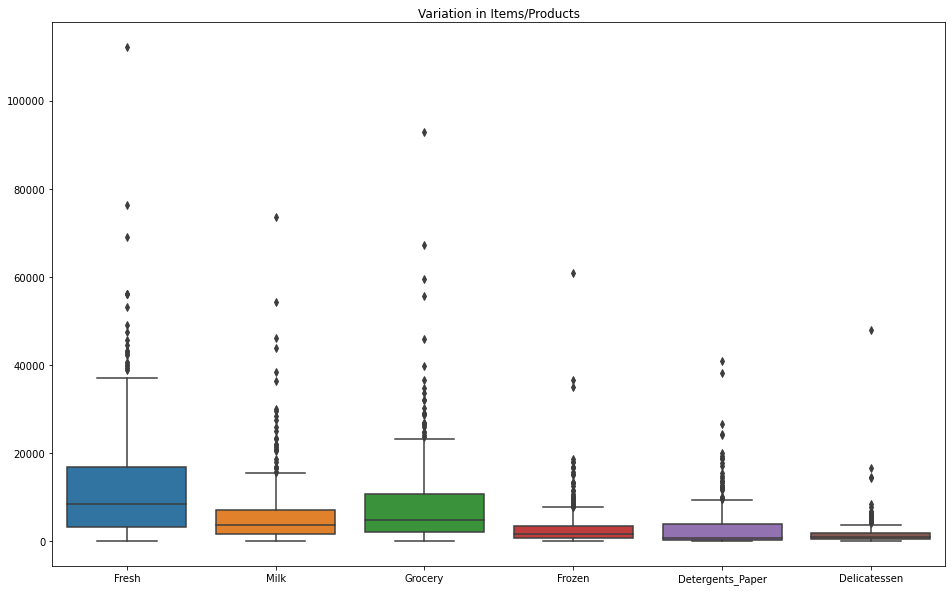

In [21]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df2)
plt.title('Variation in Items/Products')
plt.show()
 

In [23]:
print('Standard Deviation of Items/Products:')
df2.std()

Standard Deviation of Items/Products:


Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

<AxesSubplot:xlabel='Delicatessen'>

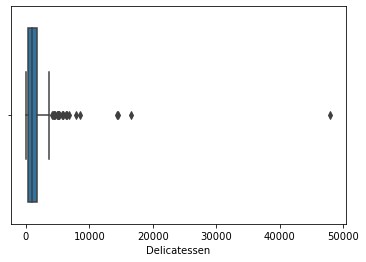

In [24]:
sns.boxplot(x='Delicatessen',data=df2)

In [57]:
df2.skew()

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

In [58]:
df2.kurt()

Fresh                11.536408
Milk                 24.669398
Grocery              20.914670
Frozen               54.689281
Detergents_Paper     19.009464
Delicatessen        170.694939
dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delicatessen', ylabel='Density'>

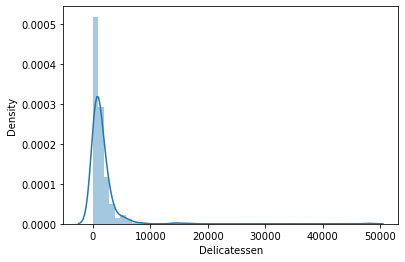

In [31]:
sns.distplot(df2.Delicatessen)

In [32]:
df.median()

Fresh                8504.0
Milk                 3627.0
Grocery              4755.5
Frozen               1526.0
Detergents_Paper      816.5
Delicatessen          965.5
total_spd           27492.0
dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fresh', ylabel='Density'>

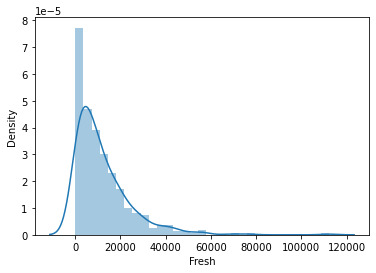

In [33]:
sns.distplot(df2['Fresh'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

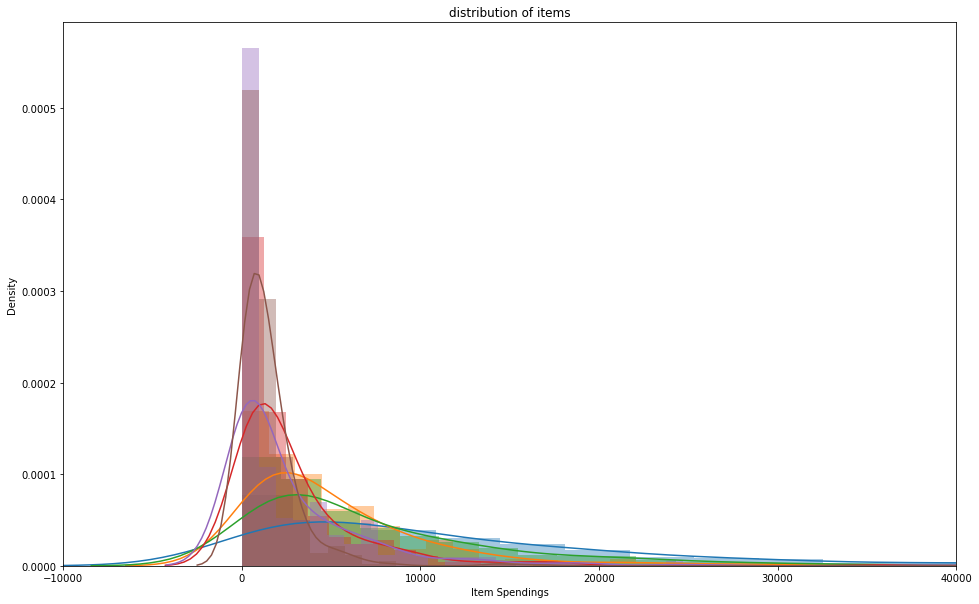

In [56]:
plt.figure(figsize=(16,10))

for i in df2.columns:
    sns.distplot(df2[i]).set_xlim(-10000,40000)
    plt.title('distribution of items')
    plt.xlabel('Item Spendings')
    